In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = symbols('t', real=True)
    return (integrate(f*conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

# Function to Approximate

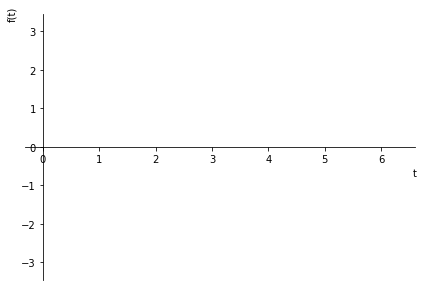

In [3]:
t = symbols('t', real=True)
f1 = pi*exp(I*t/2)
plot(f1, (t, 0, 2*pi))

In [4]:
L2_inner_product(f1, f1, 2*pi)

pi**2

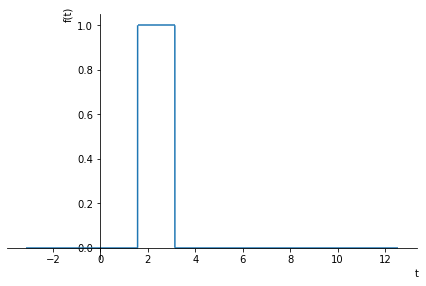

In [5]:
f2 = Piecewise(
    (0, t < pi/2),   # t is zero before time pi
    (1, t < pi),      # otherwise, t is 1
    (0, True)      # otherwise, t is 1
)
plot(f2, (t, -pi, 4*pi))

In [6]:
f = f1 # choose function to evaluate

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [7]:
k = symbols('k', real=True, integer=True)
tau = 2*pi
w0 = 2*pi/tau
psi_k = exp(-I*k*w0*t)

ak = L2_coefficient(f, psi_k, tau)

# create a function to evaluate ak
eval_ak = lambdify(k, ak)

ak

2*I/(2*k + 1)

In [7]:
ak.subs(k, -k)

Piecewise(((-1 + (-1)**(-k))/(pi*k**2), Ne(k, 0)), (pi/2, True))

In [45]:
alpha_k = (ak.subs(k, -k) + ak).simplify()
alpha_k

-12/(pi*(4*k**2 - 9))

In [46]:
beta_k =(I*(ak.subs(k, -k) - ak)).simplify()
beta_k

0

In [24]:
a0 = L2_coefficient(f, 1, tau)
a0

2/(3*pi)

In [25]:
# check that series is absolutely convergent, and in W_tau
# https://en.wikipedia.org/wiki/Absolute_convergence
s = 0
n = 100
for k in range(-n, n):
    s += abs(eval_ak(k))
s

1.9427504631577213

In [26]:
# this is just a fancy way to make sympy print the left hand side of the equation "a_k = "
# otherwise if will just print the right hand side

Eq(symbols('\psi_k'), psi_k)

Eq(\psi_k, exp(-I*k*t))

In [27]:
Eq(symbols('a_k'), ak)

Eq(a_k, -6/(pi*(4*k**2 - 9)))

$approx = a_0*\psi_0 + a_1*\psi_1 + a_{-1}*\psi_{-1} + \ldots$

$\alpha_k = a_k + a_{-k}$

In [28]:
alpha_k = ak + ak.subs(k, -k)
alpha_k

-12/(pi*(4*k**2 - 9))

$\beta_k = i(a_{-k} - a_{k})$

In [29]:
beta_k = I*(ak.subs(k, -k) - ak)
beta_k

0

In [8]:
n = 2  # onto basis functions psi_{-10} ... psi_{10}
start = -2*pi
stop = 4*pi

approx = 0
for k_i in range(-n, n+1):
    approx += (ak*psi_k).subs(k, k_i)

Eq(symbols('approx'), approx)

Eq(approx, -2*exp(I*t)/pi + pi/2 - 2*exp(-I*t)/pi)

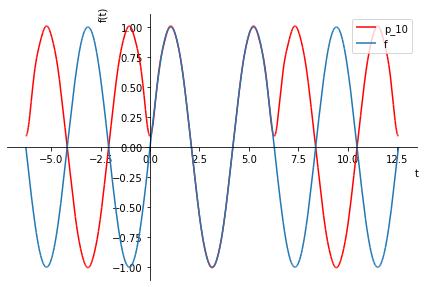

In [72]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

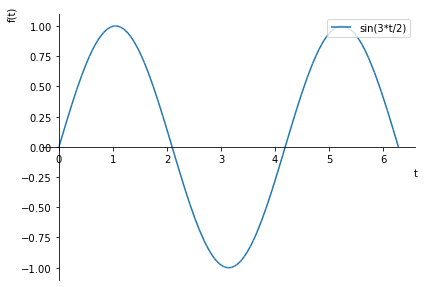

In [79]:
fig = plot(f, (t, 0, 2*pi), legend=True, show=False)
fig.show()

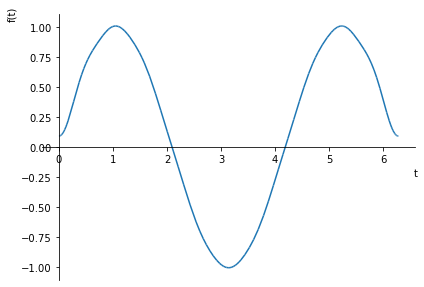

In [80]:
plot(approx, (t, 0, 2*pi), legend=False)

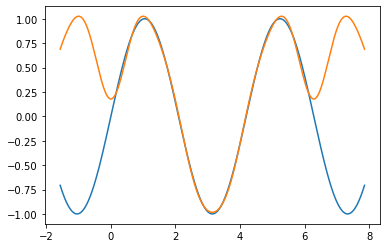

In [48]:
def do_plot():
    # how to convert symbolic functions into numerical functions
    f_func = lambdify(t, f)
    approx_func = lambdify(t, approx)
    
    # generate data
    t_vals = np.linspace(-0.5*np.pi, 2.5*np.pi, 1000)
    f_vals = f_func(t_vals)
    
    approx_vals =  np.real(approx_func(t_vals))
    plt.plot(t_vals, f_vals)
    plt.plot(t_vals, approx_vals)
    
    
    #plt.plot(0*tau, 0.5, 'ro')
    #plt.plot(tau, 0.5, 'ro')

do_plot()

In [49]:
approx

-6*exp(5*I*t)/(91*pi) - 6*exp(4*I*t)/(55*pi) - 2*exp(3*I*t)/(9*pi) - 6*exp(2*I*t)/(7*pi) + 6*exp(I*t)/(5*pi) + 2/(3*pi) + 6*exp(-I*t)/(5*pi) - 6*exp(-2*I*t)/(7*pi) - 2*exp(-3*I*t)/(9*pi) - 6*exp(-4*I*t)/(55*pi) - 6*exp(-5*I*t)/(91*pi)

In [50]:
approx.expand(complex=True)

12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) - 4*cos(3*t)/(9*pi) - 12*cos(4*t)/(55*pi) - 12*cos(5*t)/(91*pi) + 2/(3*pi)

# Power Spectrum

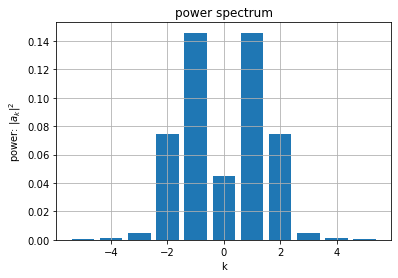

In [16]:
# there isn't a great way to do scatter plots in sympy, so we will plot our 
# power spectrum using the matplotlib library, imported at the top of this
# notebook
k_values = range(-n, n+1)
power = abs(ak)**2

# this is building a list of power values evaluating the function
# using list comprehension, a short way to write for loops
# https://www.programiz.com/python-programming/list-comprehension
power_values = [ power.subs(k, ki) for ki in k_values]
plt.bar(k_values, power_values)
plt.xlabel('k')
plt.ylabel('power: $|a_k|^2$')
plt.title('power spectrum')
plt.grid()

<BarContainer object of 11 artists>

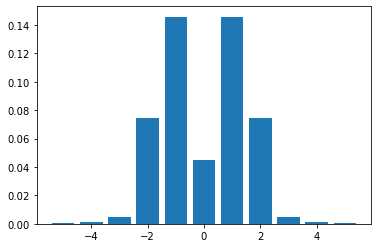

In [17]:
plt.bar(k_values, power_values)


# Using $\{1, \cos(2\pi k t/\tau), \sin(2\pi k t/\tau\}$ as Basis

In [18]:
psi_1k = cos(k*t*2*pi/tau)
Eq(symbols('\psi_1k'), psi_1k)

Eq(\psi_1k, cos(k*t))

In [19]:
alpha_k = L2_coefficient(f, psi_1k, tau)
Eq(symbols('alpha_k'), alpha_k)

Eq(alpha_k, Piecewise((-12/(pi*(4*k**2 - 9)), Ne(k, 0)), (-6/(pi*(4*k**2 - 9)), True)))

In [20]:
psi_2k = sin(k*t*2*pi/tau)
Eq(symbols('\psi_2k'), psi_2k)

Eq(\psi_2k, sin(k*t))

In [21]:
beta_k = L2_coefficient(f, psi_2k, tau)
Eq(symbols('beta_k'), beta_k)

Eq(beta_k, 0)

In [22]:
psi_1 = 1
a_0 = L2_coefficient(f, psi_1, tau)
Eq(symbols('a_0'), a_0)

Eq(a_0, 2/(3*pi))

In [23]:
approx = a_0
for k_i in range(1, n+1):
    approx += (alpha_k*psi_1k + beta_k*psi_2k).subs(k, k_i)
    print(approx)

12*cos(t)/(5*pi) + 2/(3*pi)
12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) + 2/(3*pi)
12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) - 4*cos(3*t)/(9*pi) + 2/(3*pi)
12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) - 4*cos(3*t)/(9*pi) - 12*cos(4*t)/(55*pi) + 2/(3*pi)
12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) - 4*cos(3*t)/(9*pi) - 12*cos(4*t)/(55*pi) - 12*cos(5*t)/(91*pi) + 2/(3*pi)


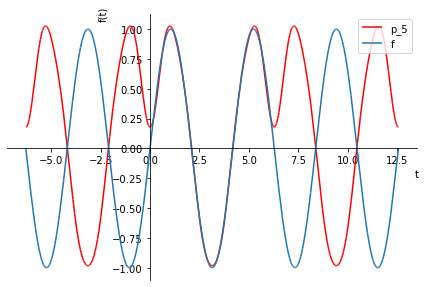

In [24]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

In [25]:
approx

12*cos(t)/(5*pi) - 12*cos(2*t)/(7*pi) - 4*cos(3*t)/(9*pi) - 12*cos(4*t)/(55*pi) - 12*cos(5*t)/(91*pi) + 2/(3*pi)